In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cic-iot-2023-reduced/ciciot2023-reduced.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import load_model, Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import classification_report
import seaborn as sns
%matplotlib inline
from sklearn.utils import shuffle

In [4]:
data = pd.read_csv('/kaggle/input/cic-iot-2023-reduced/ciciot2023-reduced.csv')
data.head()

,Unnamed: 0,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0,0.0,0.0,1.0,64.0,30.337559,30.337559,0.0,0.0,0.0,...,0.0,42.0,8.314949e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
1,1,0.0,0.0,1.0,64.0,0.689640,0.689640,0.0,0.0,0.0,...,0.0,42.0,8.312898e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
2,2,0.0,0.0,1.0,64.0,1.350653,1.350653,0.0,0.0,0.0,...,0.0,42.0,8.314964e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
3,3,0.0,0.0,1.0,64.0,3.637768,3.637768,0.0,0.0,0.0,...,0.0,42.0,8.312906e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood
4,4,0.0,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,42.0,8.312889e+07,9.5,9.165151,0.0,0.0,0.0,141.55,DDoS-ICMP_Flood


In [5]:
data.drop(columns='Unnamed: 0', inplace=True)
data

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,30.337559,30.337559,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,0.0,1.0,64.0,0.689640,0.689640,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312898e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
2,0.000000,0.0,1.0,64.0,1.350653,1.350653,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314964e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
3,0.000000,0.0,1.0,64.0,3.637768,3.637768,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312906e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312889e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,21.931409,3877.2,3.1,57.1,35.848699,35.848699,0.0,0.0,0.0,0.0,...,251.519584,147.8,3.352358e-02,5.5,20.309082,355.702407,72476.897264,0.9,38.50,Uploading_Attack
1177094,623.726814,86935.3,5.5,70.4,0.214131,0.214131,0.0,0.0,0.0,0.0,...,437.244141,684.1,1.630549e-02,5.5,22.382339,618.356594,568501.573782,0.9,38.50,Uploading_Attack
1177095,82.325677,7351.8,13.2,71.2,28.355732,28.355732,0.0,0.0,0.0,0.0,...,47.763924,157.1,1.115448e-02,5.5,17.417450,67.548389,2551.505968,0.9,38.50,Uploading_Attack
1177096,45.667144,2508.2,10.4,111.6,129097.868387,129097.868387,0.0,0.0,0.0,0.0,...,45.064730,109.2,4.131398e-02,5.5,14.717295,63.731153,2333.652536,0.9,38.50,Uploading_Attack


In [7]:
dataset = data.copy()
dataset.drop(columns=['Telnet', 'DHCP', 'SMTP'], inplace=True)

In [8]:
dataset

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,0.000000,0.0,1.0,64.0,30.337559,30.337559,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314949e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
1,0.000000,0.0,1.0,64.0,0.689640,0.689640,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312898e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
2,0.000000,0.0,1.0,64.0,1.350653,1.350653,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.314964e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
3,0.000000,0.0,1.0,64.0,3.637768,3.637768,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312906e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
4,0.000000,0.0,1.0,64.0,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,42.0,8.312889e+07,9.5,9.165151,0.000000,0.000000,0.0,141.55,DDoS-ICMP_Flood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,21.931409,3877.2,3.1,57.1,35.848699,35.848699,0.0,0.0,0.0,0.0,...,251.519584,147.8,3.352358e-02,5.5,20.309082,355.702407,72476.897264,0.9,38.50,Uploading_Attack
1177094,623.726814,86935.3,5.5,70.4,0.214131,0.214131,0.0,0.0,0.0,0.0,...,437.244141,684.1,1.630549e-02,5.5,22.382339,618.356594,568501.573782,0.9,38.50,Uploading_Attack
1177095,82.325677,7351.8,13.2,71.2,28.355732,28.355732,0.0,0.0,0.0,0.0,...,47.763924,157.1,1.115448e-02,5.5,17.417450,67.548389,2551.505968,0.9,38.50,Uploading_Attack
1177096,45.667144,2508.2,10.4,111.6,129097.868387,129097.868387,0.0,0.0,0.0,0.0,...,45.064730,109.2,4.131398e-02,5.5,14.717295,63.731153,2333.652536,0.9,38.50,Uploading_Attack


In [9]:
dataset.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,...,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06,1.177098e+06
mean,2.797806e+01,6.447324e+05,9.727536e+00,9.466363e+01,4.495814e+03,4.495814e+03,5.210983e-07,3.395979e-02,9.441610e-02,3.643877e-02,...,4.423327e+02,3.040127e+02,4.427145e+02,8.332583e+07,9.500390e+00,2.427685e+01,4.294849e+02,3.877413e+05,5.527144e-01,1.415569e+02
std,2.789426e+02,1.169586e+06,9.151269e+00,4.666282e+01,6.180899e+04,6.180899e+04,1.261112e-04,1.811258e-01,2.924069e-01,1.873793e-01,...,5.816266e+02,5.014538e+02,5.859603e+02,6.461473e+07,3.104848e+00,1.660295e+01,7.096259e+02,1.380319e+06,4.397034e-01,7.996218e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.200000e+01,0.000000e+00,4.200000e+01,0.000000e+00,1.000000e+00,9.165151e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,2.559465e-02,8.400000e+01,6.000000e+00,6.400000e+01,9.840240e+00,9.840240e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.401677e+01,0.000000e+00,5.406000e+01,1.659933e-02,5.500000e+00,1.039357e+01,0.000000e+00,0.000000e+00,0.000000e+00,3.850000e+01
50%,5.749314e+00,5.308980e+04,6.000000e+00,6.591000e+01,3.974216e+01,3.974216e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,1.274585e+02,4.738432e+01,1.176000e+02,8.315033e+07,9.500000e+00,1.578336e+01,6.645081e+01,3.226114e+03,8.000000e-01,1.415500e+02
75%,3.338861e+01,8.073643e+05,9.300000e+00,1.133000e+02,8.183739e+01,8.183739e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,5.920000e+02,5.236078e+02,5.920000e+02,1.665181e+08,1.350000e+01,3.437831e+01,7.394102e+02,3.204772e+05,1.000000e+00,2.446000e+02
max,7.472130e+04,9.825656e+06,4.700000e+01,2.550000e+02,7.340032e+06,7.340032e+06,5.928655e-02,1.000000e+00,1.000000e+00,1.000000e+00,...,1.160047e+04,1.099626e+04,1.309800e+04,1.676394e+08,1.500000e+01,1.453904e+02,1.555106e+04,1.372844e+08,1.000000e+00,2.446000e+02


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177098 entries, 0 to 1177097
Data columns (total 44 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   flow_duration    1177098 non-null  float64
 1   Header_Length    1177098 non-null  float64
 2   Protocol Type    1177098 non-null  float64
 3   Duration         1177098 non-null  float64
 4   Rate             1177098 non-null  float64
 5   Srate            1177098 non-null  float64
 6   Drate            1177098 non-null  float64
 7   fin_flag_number  1177098 non-null  float64
 8   syn_flag_number  1177098 non-null  float64
 9   rst_flag_number  1177098 non-null  float64
 10  psh_flag_number  1177098 non-null  float64
 11  ack_flag_number  1177098 non-null  float64
 12  ece_flag_number  1177098 non-null  float64
 13  cwr_flag_number  1177098 non-null  float64
 14  ack_count        1177098 non-null  float64
 15  syn_count        1177098 non-null  float64
 16  fin_count        1

In [11]:
dataset = shuffle(dataset).reset_index(drop=True)

In [12]:
y_label = dataset['label'].unique()
y_label

array(['DDoS-SynonymousIP_Flood', 'BenignTraffic', 'Recon-HostDiscovery',
       'DDoS-SYN_Flood', 'DDoS-UDP_Flood', 'DDoS-TCP_Flood',
       'DoS-TCP_Flood', 'Mirai-udpplain', 'Mirai-greeth_flood',
       'DDoS-PSHACK_Flood', 'DDoS-ICMP_Flood', 'DDoS-RSTFINFlood',
       'DoS-UDP_Flood', 'DNS_Spoofing', 'DoS-SYN_Flood',
       'Mirai-greip_flood', 'DDoS-ACK_Fragmentation',
       'DDoS-UDP_Fragmentation', 'Recon-PortScan', 'Recon-OSScan',
       'MITM-ArpSpoofing', 'DoS-HTTP_Flood', 'Recon-PingSweep',
       'DDoS-ICMP_Fragmentation', 'CommandInjection', 'DDoS-SlowLoris',
       'SqlInjection', 'Uploading_Attack', 'BrowserHijacking',
       'VulnerabilityScan', 'XSS', 'DDoS-HTTP_Flood', 'Backdoor_Malware',
       'DictionaryBruteForce'], dtype=object)

In [13]:
## Working on a binary classification
# dataset.replace(to_replace=['Mirai-udpplain', 'DDoS-SYN_Flood',
#        'DDoS-SynonymousIP_Flood', 'DoS-SYN_Flood', 'DDoS-TCP_Flood',
#        'DDoS-PSHACK_Flood', 'Mirai-greip_flood', 'VulnerabilityScan',
#        'DDoS-ICMP_Flood', 'DoS-TCP_Flood', 'DDoS-UDP_Flood',
#        'DoS-UDP_Flood', 'DDoS-UDP_Fragmentation', 'CommandInjection',
#        'DDoS-RSTFINFlood', 'MITM-ArpSpoofing', 'DDoS-ACK_Fragmentation',
#        'DDoS-HTTP_Flood', 'Mirai-greeth_flood', 'DNS_Spoofing',
#        'DDoS-ICMP_Fragmentation', 'DoS-HTTP_Flood', 'Recon-PortScan',
#        'Recon-HostDiscovery', 'Recon-OSScan', 'DDoS-SlowLoris',
#        'Recon-PingSweep', 'DictionaryBruteForce', 'XSS', 'SqlInjection',
#        'Backdoor_Malware', 'Uploading_Attack', 'BrowserHijacking'], value=1, inplace=True)
# dataset.replace(to_replace='BenignTraffic', value=0, inplace=True)

# Creating a dictionary of attack types for 33 attack classes + 1 for benign traffic
dict_34_classes = {'BenignTraffic': 0 ,
                    'DDoS-RSTFINFlood' :1, 'DDoS-PSHACK_Flood':2,  'DDoS-SYN_Flood':3, 'DDoS-UDP_Flood':4, 'DDoS-TCP_Flood':5, 
                    'DDoS-ICMP_Flood':6, 'DDoS-SynonymousIP_Flood':7, 'DDoS-ACK_Fragmentation':8, 'DDoS-UDP_Fragmentation':9, 'DDoS-ICMP_Fragmentation':10, 
                    'DDoS-SlowLoris':11, 'DDoS-HTTP_Flood':12, 'DoS-UDP_Flood':13, 'DoS-SYN_Flood':14, 'DoS-TCP_Flood':15, 'DoS-HTTP_Flood':16,                 # DDoS and DoS
                    'Mirai-greeth_flood': 17, 'Mirai-greip_flood': 18, 'Mirai-udpplain': 19,                                                                    # Mirai 
                    'Recon-PingSweep': 20, 'Recon-OSScan': 21, 'Recon-PortScan': 22, 'VulnerabilityScan': 23, 'Recon-HostDiscovery': 24,                        # Reconnaissance
                    'DNS_Spoofing': 25, 'MITM-ArpSpoofing': 26,                                                                                                 # Spoofing
                    'BrowserHijacking': 27, 'Backdoor_Malware': 28, 'XSS': 29, 'Uploading_Attack': 30, 'SqlInjection': 31, 'CommandInjection': 32,              # Web
                    'DictionaryBruteForce': 33}                                                                                                                 # Brute Force                                                                                                                                      # Brute Force

dict_2_classes = {  0: 0 ,
                    1 :1, 2:1,  3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1,                                                    # DDoS and DoS  
                    17: 1, 18: 1, 19: 1,                                                                                                                        # Mirai 
                    20: 1, 21: 1, 22: 1, 23: 1, 24: 1,                                                                                                          # Reconnaissance
                    25: 1, 26: 1,                                                                                                                               # Spoofing
                    27: 1, 28: 1, 29: 1, 30: 1, 31: 1, 32: 1,                                                                                                   # Web
                    33: 1}                                                                                                                                      # Brute Force

# Map y column to the dict_34_classes values
dataset['label'] = dataset['label'].map(dict_34_classes)
dataset['label'] = dataset['label'].map(dict_2_classes)

In [14]:
dataset.label.value_counts()

label
0    687403
1    489695
Name: count, dtype: int64

In [73]:
# new_df = pd.concat([dataset[dataset['label']==0], dataset[dataset['label']==1].sample(frac=.8)], axis=0, ignore_index=True).reset_index(drop=True)

In [15]:
new_df.label.value_counts()

NameError: name 'new_df' is not defined

In [ ]:
391756/(687403+391756)

<Axes: xlabel='label'>

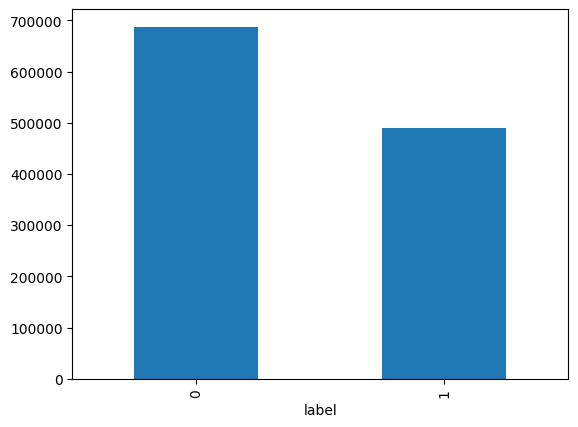

In [16]:
dataset.label.value_counts().plot.bar()

In [34]:
dataset = shuffle(dataset).reset_index(drop=True)

In [35]:
### splitting the dataset into train, validation and test set.
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42, shuffle=True)
X_test_p1, X_test_p, y_test_p1, y_test_p = train_test_split(X_test, y_test, test_size=0.8, random_state=42, shuffle=True)


print(f"X train {X_train.shape}")
print(f"X val {X_val.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y val {y_val.shape}")
print(f"Y test {y_test.shape}")

X train (823968, 43)
X val (176565, 43)
X test (176565, 43)
Y train (823968,)
Y val (176565,)
Y test (176565,)


In [36]:
scalar = StandardScaler()
scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(X_test)
X_test_p1_scaled = scalar.transform(X_test_p1)
X_test_p_scaled = scalar.transform(X_test_p)

In [37]:
# initializing the model
model = Sequential()
model.add(tf.keras.layers.Input(shape=(43,)))

model.add(Dense(units=4))
# model.add(BatchNormalization(),)
model.add(Activation('relu'))

model.add(Dense(units=4))
# model.add(BatchNormalization(),)
model.add(Activation('relu'))

model.add(Dense(units=1),)
model.add(Activation('sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.000008), 
              loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=40, verbose=1,
                    batch_size=512, callbacks=[callback])


Epoch 1/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3961 - loss: 0.7840 - val_accuracy: 0.4203 - val_loss: 0.7378
Epoch 2/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4262 - loss: 0.7268 - val_accuracy: 0.4646 - val_loss: 0.6898
Epoch 3/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4772 - loss: 0.6798 - val_accuracy: 0.5340 - val_loss: 0.6498
Epoch 4/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5538 - loss: 0.6420 - val_accuracy: 0.6290 - val_loss: 0.6159
Epoch 5/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6535 - loss: 0.6090 - val_accuracy: 0.7311 - val_loss: 0.5862
Epoch 6/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7599 - loss: 0.5797 - val_accuracy: 0.8288 - val_loss: 0.5582
Epoch 7/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8394 - loss: 0.5526 - val_accuracy: 0.8697 - val_loss: 0.5320
Epoch 8/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8757 - loss: 0.5266 - 

In [50]:
y_pred = model.predict(X_test_p1_scaled)
y_pred = (y_pred > 0.5)
print('\n\nConfusion Matrixs')
print(confusion_matrix(y_test_p1, y_pred))
print('\n\nEvaluation metrics')
print(classification_report(y_test_p1, y_pred))

1104/1104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Confusion Matrixs
[[20610     7]
 [  694 14002]]


Evaluation metrics
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     20617
           1       1.00      0.95      0.98     14696

    accuracy                           0.98     35313
   macro avg       0.98      0.98      0.98     35313
weighted avg       0.98      0.98      0.98     35313



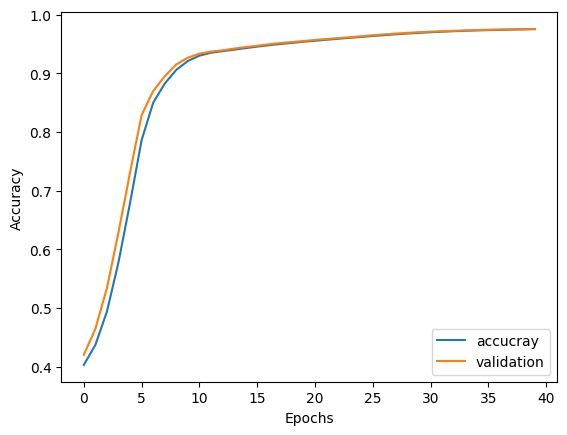

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accucray', 'validation'], loc = 'lower right')
# plt.yticks(ticks=[0.9, 0.92, 0.94, 0.96, 0.98, 1])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

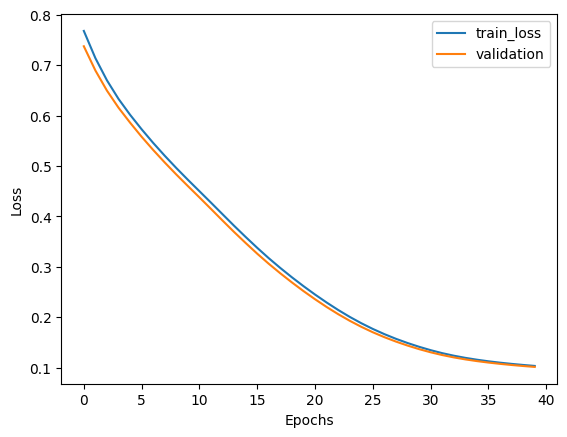

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'validation'], loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [ ]:
yy_pred = model.predict(X_test_p_scaled)
yy_pred = (yy_pred > 0.5)
print('\n\nConfusion Matrixs')
print(confusion_matrix(y_test_p, yy_pred))
print('\n\nEvaluation metrics')
print(classification_report(y_test_p, yy_pred))

In [41]:
yy_pred = model.predict(X_test_scaled)
yy_pred = (yy_pred > 0.5)
print('\n\nConfusion Matrixs')
print(confusion_matrix(y_test, yy_pred))
print('\n\nEvaluation metrics')
print(classification_report(y_test, yy_pred, ))

5518/5518 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


Confusion Matrixs
[[102212    610]
 [  3814  69929]]


Evaluation metrics
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    102822
           1       0.99      0.95      0.97     73743

    accuracy                           0.97    176565
   macro avg       0.98      0.97      0.97    176565
weighted avg       0.98      0.97      0.97    176565



In [42]:
model.save("classical_nn_detector.h5")

In [43]:
model.save("classical_nn_detector.hdf5")

In [44]:
model.save("classical_nn_detector.keras")

## Performing feature selection to select top 32 features out of 47

##### Wrapper method used. RFE was utilized
**Reason:** A wrapper method uses a model to calculate the feature's importance. ***Must use a model that has a way of calculating feature importance(tree-based models)***
>>Gradient Boost Classifier was used<<


In [56]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import RFE

# Initialize classifier
gbc = GradientBoostingClassifier(max_depth=5, random_state=42)

RFE_selector = RFE(estimator=gbc, n_features_to_select=32, step=43)
RFE_selector.fit(X_train, y_train)

selected_features_mask = RFE_selector.get_support()




AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [79]:
dataset.columns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'SSH',
       'IRC', 'TCP', 'UDP', 'ARP', 'ICMP', 'IPv', 'LLC', 'Tot sum', 'Min',
       'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius',
       'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

In [80]:
column = dataset.drop('label', axis=1).columns.values
len(column)

43

In [81]:
dummy = pd.DataFrame(X_train, columns=column)
dummy


,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,...,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,0.000000,54.00,6.00,64.00,0.984080,0.984080,0.0,0.0,0.0,0.0,...,54.000000,0.000000,54.00,8.306415e+07,9.5,10.392305,0.000000,0.000000e+00,0.00,141.55
1,0.005509,7.21,46.29,65.71,18.062650,18.062650,0.0,0.0,0.0,0.0,...,584.569128,24.574592,583.68,8.367732e+07,9.5,34.188599,34.816693,3.046243e+03,0.21,141.55
2,1.797879,2253.20,17.00,83.10,45.716940,45.716940,0.0,0.0,0.0,0.0,...,84.382045,59.841456,71.20,1.665225e+08,13.5,13.001828,84.780932,3.601645e+03,1.00,244.60
3,2.226020,604496.00,6.00,64.00,238.316365,238.316365,0.0,0.0,0.0,0.0,...,1404.200210,460.057161,1658.80,1.665245e+08,13.5,52.975516,652.376161,2.156044e+05,1.00,244.60
4,12.672197,518868.90,7.60,90.80,65.003979,65.003979,0.0,0.0,0.0,0.0,...,2368.639167,1981.241510,1336.50,7.516909e-03,5.5,67.837772,2801.898614,4.709723e+06,0.90,38.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
823963,0.000000,0.00,47.00,64.00,33.449801,33.449801,0.0,0.0,0.0,0.0,...,592.000000,0.000000,592.00,8.367700e+07,9.5,34.409301,0.000000,0.000000e+00,0.00,141.55
823964,13.975692,5776.00,9.90,126.80,2.745906,2.745906,0.0,0.0,0.0,0.0,...,122.164722,59.054794,116.70,1.870251e-02,5.5,15.463464,83.516091,3.926373e+03,0.90,38.50
823965,11.155905,1167495.00,6.00,231.00,90.669361,90.669361,0.0,0.0,0.0,0.0,...,1528.469304,1950.872580,66.00,1.665247e+08,13.5,55.176570,2763.118268,3.823131e+06,1.00,244.60
823966,0.821328,768963.08,17.00,64.00,3008.600076,3008.600076,0.0,0.0,0.0,0.0,...,554.000000,0.000000,554.00,8.378465e+07,9.5,33.286634,0.000000,0.000000e+00,0.00,141.55


In [88]:
selected_features_x = dummy.columns[selected_features_mask]
selected_features_x

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
       'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP',
       'HTTPS', 'SSH', 'TCP', 'ARP', 'Tot sum', 'Min', 'Max', 'AVG', 'Std',
       'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
       'Variance', 'Weight'],
      dtype='object')

In [89]:
selected_x_y = ['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'syn_flag_number', 'rst_flag_number', 'psh_flag_number',
       'ack_count', 'syn_count', 'fin_count', 'urg_count', 'rst_count', 'HTTP',
       'HTTPS', 'SSH', 'TCP', 'ARP', 'Tot sum', 'Min', 'Max', 'AVG', 'Std',
       'Tot size', 'IAT', 'Number', 'Magnitue', 'Radius', 'Covariance',
       'Variance', 'Weight', 'label']

## Using top 32 selecte features

In [90]:
new_dataset = dataset[selected_x_y]
new_dataset

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,syn_flag_number,rst_flag_number,psh_flag_number,ack_count,...,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight,label
0,44.829603,1852897.4,6.00,198.0,73.200625,73.200625,0.0,0.0,0.0,0.0,...,31.248098,75.00,7.236004e-03,5.5,13.497765,44.191484,1.117152e+03,0.90,38.50,0
1,0.000000,2.7,1.48,64.0,37.057557,37.057557,0.0,0.0,0.0,0.0,...,2.670248,43.44,8.312463e+07,9.5,9.290669,3.781441,4.788085e+01,0.15,141.55,1
2,45.586551,3139298.4,6.00,198.4,68.780339,68.780339,0.0,0.0,0.0,0.0,...,8.150376,75.00,1.665176e+08,13.5,11.658070,11.594492,1.681199e+02,0.40,244.60,0
3,43.673104,577795.0,8.20,82.7,37.549473,37.549473,0.0,0.0,0.0,0.0,...,617.967881,1107.40,2.701988e-02,5.5,31.952491,873.938558,6.135435e+05,0.90,38.50,0
4,36.438897,72486.6,5.50,69.1,10.774236,10.774236,0.0,0.0,0.0,0.0,...,542.466943,914.00,1.044297e-03,5.5,43.077014,767.164107,3.314680e+05,0.90,38.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177093,97.909624,515027.2,9.80,76.3,33.837677,33.837677,0.0,0.0,0.0,0.0,...,1387.352266,1872.90,8.102012e-03,5.5,28.377167,1962.012390,6.145348e+06,0.90,38.50,0
1177094,25.309796,1553980.8,8.20,215.9,60.789647,60.789647,0.0,0.0,0.0,0.0,...,10.664903,80.40,1.665175e+08,13.5,11.667317,15.195038,3.353826e+02,1.00,244.60,0
1177095,72.765205,3199474.9,6.00,200.9,40.976009,40.976009,0.0,0.0,0.0,0.0,...,973.327723,78.80,1.665211e+08,13.5,40.386179,1378.501797,9.514428e+05,1.00,244.60,0
1177096,0.000000,42.0,17.00,64.0,3.007398,3.007398,0.0,0.0,0.0,0.0,...,0.000000,42.00,8.300352e+07,9.5,9.165151,0.000000,0.000000e+00,0.00,141.55,1


In [92]:
new_dataset.shape

(1177098, 33)

In [95]:
new_dataset.label.value_counts()

label
0    687403
1    489695
Name: count, dtype: int64

#### Starting the training

In [132]:
new_dataset = shuffle(new_dataset).reset_index(drop=True)

In [133]:
### splitting the dataset into train, validation and test set.
X = new_dataset.iloc[:, :-1].values
y = new_dataset.iloc[:, -1].values

X_train, X_, y_train, y_ = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.5, random_state=42, shuffle=True)
X_test_p1, X_test_p, y_test_p1, y_test_p = train_test_split(X_test, y_test, test_size=0.8, random_state=42, shuffle=True)


print(f"X train {X_train.shape}")
print(f"X val {X_val.shape}")
print(f"X test {X_test.shape}")
print(f"Y train {y_train.shape}")
print(f"Y val {y_val.shape}")
print(f"Y test {y_test.shape}")

X train (823968, 32)
X val (176565, 32)
X test (176565, 32)
Y train (823968,)
Y val (176565,)
Y test (176565,)


In [134]:
scalar = StandardScaler()
scalar.fit(X_train)

X_train_scaled = scalar.transform(X_train)
X_val_scaled = scalar.transform(X_val)
X_test_scaled = scalar.transform(X_test)
X_test_p1_scaled = scalar.transform(X_test_p1)
X_test_p_scaled = scalar.transform(X_test_p)

In [137]:
# initializing the model
model = Sequential()
model.add(tf.keras.layers.Input(shape=(32,)))

model.add(Dense(units=4))
# model.add(BatchNormalization(),)
model.add(Activation('relu'))

model.add(Dense(units=4))
# model.add(BatchNormalization(),)
model.add(Activation('relu'))

model.add(Dense(units=1),)
model.add(Activation('sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0000078), 
              loss=tf.keras.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [138]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=2)
history = model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=40, verbose=1,
                    batch_size=512, callbacks=[callback])


Epoch 1/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5627 - loss: 0.6988 - val_accuracy: 0.5652 - val_loss: 0.6687
Epoch 2/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5651 - loss: 0.6600 - val_accuracy: 0.5634 - val_loss: 0.6354
Epoch 3/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5596 - loss: 0.6271 - val_accuracy: 0.5487 - val_loss: 0.6038
Epoch 4/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5489 - loss: 0.5972 - val_accuracy: 0.5459 - val_loss: 0.5802
Epoch 5/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5799 - loss: 0.5749 - val_accuracy: 0.6648 - val_loss: 0.5602
Epoch 6/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6705 - loss: 0.5556 - val_accuracy: 0.7164 - val_loss: 0.5428
Epoch 7/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7325 - loss: 0.5388 - val_accuracy: 0.7917 - val_loss: 0.5290
Epoch 8/40
1610/1610 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7910 - loss: 0.5262 - 

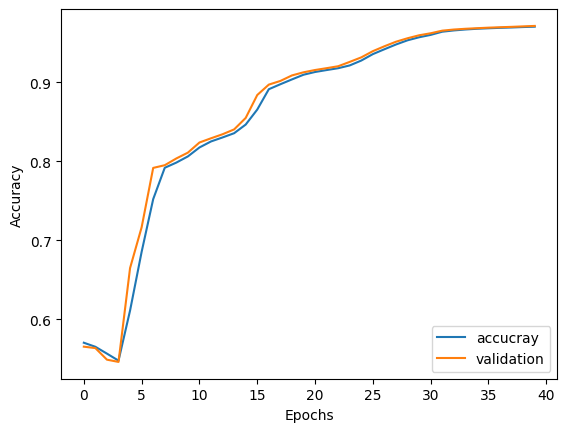

In [139]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accucray', 'validation'], loc = 'lower right')
# plt.yticks(ticks=[0.9, 0.92, 0.94, 0.96, 0.98, 1])
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.show()

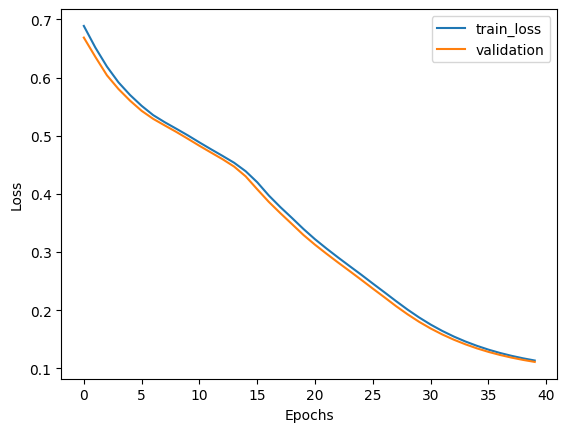

In [140]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train_loss', 'validation'], loc = 'upper right')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [110]:
yy_pred = model.predict(X_test_scaled)
yy_pred = (yy_pred > 0.5)
print('\n\nConfusion Matrixs')
print(confusion_matrix(y_test, yy_pred))
print('\n\nEvaluation metrics')
print(classification_report(y_test, yy_pred, ))

5518/5518 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step


Confusion Matrixs
[[102426    762]
 [  3355  70022]]


Evaluation metrics
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    103188
           1       0.99      0.95      0.97     73377

    accuracy                           0.98    176565
   macro avg       0.98      0.97      0.98    176565
weighted avg       0.98      0.98      0.98    176565



In [ ]:
from sklearn.metrics import f1_score

rfe_f1_score_list = []
X_train_v3 = dataset.drop('label')
y_trian_v3 = dataset.label

for k in range(1, 44):
    RFE_selector = RFE(estimator=gbc, n_features_to_select=k, step=10)
    RFE_selector.fit(X_train_v3, y_train_v3)
    
    sel_X_train_v3 = RFE_selector.transform(X_train_v3)
    sel_X_test_v3 = RFE_selector.transform(X_test_v3)
    
    gbc.fit(sel_X_train_v3, y_train_v3)
    RFE_preds = gbc.predict(sel_X_test_v3)
    
    f1_score_rfe = round(f1_score(y_test_v3, RFE_preds, average='weighted'), 3)
    
    rfe_f1_score_list.append(f1_score_rfe)



In [ ]:
fig, ax = plt.subplots()

x = np.arange(1, 14)
y = rfe_f1_score_list

ax.bar(x, y, width=0.2)
ax.set_xlabel('Number of features selected using RFE')
ax.set_ylabel('F1-Score (weighted)')
ax.set_ylim(0, 1.2)
ax.set_xticks(np.arange(1, 14))
ax.set_xticklabels(np.arange(1, 14), fontsize=12)

for i, v in enumerate(y):
    plt.text(x=i+1, y=v+0.05, s=str(v), ha='center')
    
plt.tight_layout()